* Set objective function to ATP minimization
* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate)
* Print all fluxes, find biomass function and NADPH functions (in PPP): 'TALA'=Transaldolase, 'TKT1'=Transketolase, 'TKT2'=Transketolase, 'RPI'=Ribose-5-phosphate isomerase, 'G6PDH2rp'=Glucose 6-phosphate dehydrogenase, 'GND'=Phosphogluconate dehydrogenase, 'PGLp'=6-phosphogluconolactonase

* Make a graph where specific growth rate is on x-axis and the flux is on y-axis


In [41]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [27]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")
# Changing the objective function
model.objective = "ATPM" 
solution = model.optimize('minimize') # minimize the objective function

In [46]:
# Change bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30

GR_range= [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
df = pd.DataFrame(columns=['GR','TALA', 'TKT1', 'TKT2', 'RPI', 'G6PDH2rp', 'GND', 'PGLp'])

for i in range(len(GR_range)):
    model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
    model.objective = "ATPM" 
    solution = model.optimize('minimize')
    solution.objective_value
    GR_flux = solution.fluxes.BIOMASS_RT
    TALA_flux = solution.fluxes.TALA
    TKT1_flux = solution.fluxes.TKT1
    TKT2_flux = solution.fluxes.TKT2
    RPI_flux = solution.fluxes.RPI
    G6PDH2rp_flux = solution.fluxes.G6PDH2rp
    GND_flux = solution.fluxes.GND
    PGLp_flux = solution.fluxes.PGLp
    df.loc[i, 'GR'] = GR_flux
    df.loc[i, 'TALA'] =round(TALA_flux,2)
    df.loc[i, 'TKT1'] =round(TKT1_flux,2)
    df.loc[i, 'TKT2'] =round(TKT2_flux,2)
    df.loc[i, 'RPI'] =round(RPI_flux,2)
    df.loc[i, 'G6PDH2rp'] =round(G6PDH2rp_flux,2)
    df.loc[i, 'GND'] =round(GND_flux,2)
    df.loc[i, 'PGLp'] =round(PGLp_flux,2)    

print(df)

# Extract flux values
TALA_fluxes = df['TALA']
TKT1_fluxes = df['TKT1']
TKT2_fluxes = df['TKT2']
RPI_fluxes = df['RPI']
G6PDH2rp_fluxes = df['G6PDH2rp']
GND_fluxes = df['GND']
PGLp_fluxes = df['PGLp']


c:\Users\Maive\miniconda3\envs\bachelor_thesis\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.


     GR  TALA  TKT1  TKT2   RPI G6PDH2rp  GND PGLp
0   0.0 -0.02 -0.02 -0.02  0.02      0.0  0.0  0.0
1  0.05 -0.14 -0.14 -0.15  0.05      0.0  0.0  0.0
2   0.1 -0.23 -0.23 -0.25  0.07      0.0  0.0  0.0
3  0.15 -0.34 -0.34 -0.37   0.1      0.0  0.0  0.0
4   0.2 -0.45 -0.45 -0.49  0.13      0.0  0.0  0.0
5  0.25 -0.57 -0.57 -0.61  0.16      0.0  0.0  0.0
6   0.3 -0.68 -0.68 -0.74   0.2      0.0  0.0  0.0


In [40]:
# Get all flux values
all_fluxes = solution.fluxes
print(all_fluxes)


ALCD25yi       0.000000e+00
MTHFCm         0.000000e+00
AMPN           2.294918e-17
DAGCPTer_RT    0.000000e+00
PYRt2          0.000000e+00
                   ...     
FOLt           0.000000e+00
NADtm          0.000000e+00
EX_pydxn_e     0.000000e+00
PYDXNtr        0.000000e+00
RIBFLVt2       0.000000e+00
Name: fluxes, Length: 2398, dtype: float64


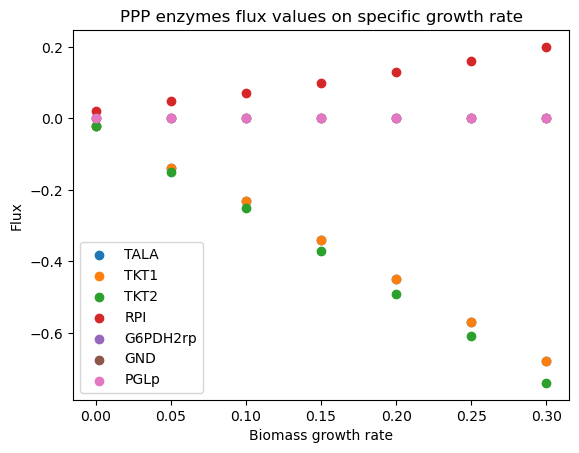

In [53]:
# Plot the flux values

x = GR_range
y = [TALA_fluxes, TKT1_fluxes, TKT2_fluxes, RPI_fluxes, G6PDH2rp_fluxes, GND_fluxes, PGLp_fluxes]
labels = ['TALA', 'TKT1', 'TKT2', 'RPI', 'G6PDH2rp', 'GND', 'PGLp']
# plt.plot(x1, y1, label='Plot 1')
for i in range(len(x)):
    plt.scatter(x, y[i], label=labels[i])

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title('PPP enzymes flux values on specific growth rate')
plt.legend()
plt.show()
